In [1]:
# To mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('/content/gdrive/MyDrive/SPOTIFY_PROB/1673873388_rolling_stones_spotify.xlsx')

In [4]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [5]:
df = df.drop('Unnamed: 0',axis=1)


In [6]:
df.tail()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.967,39,154080
1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.446,36,245266
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.835,30,176080
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.532,27,121680
1609,Walking The Dog,The Rolling Stones,1964-04-16,12,43SkTJJ2xleDaeiE4TIM70,spotify:track:43SkTJJ2xleDaeiE4TIM70,0.3830,0.727,0.934,0.068500,0.0965,-8.373,0.0359,125.275,0.969,35,189186


In [7]:
df.shape

(1610, 17)

Checking Missing Value

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   id                1610 non-null   object        
 5   uri               1610 non-null   object        
 6   acousticness      1610 non-null   float64       
 7   danceability      1610 non-null   float64       
 8   energy            1610 non-null   float64       
 9   instrumentalness  1610 non-null   float64       
 10  liveness          1610 non-null   float64       
 11  loudness          1610 non-null   float64       
 12  speechiness       1610 non-null   float64       
 13  tempo             1610 non-null   float64       
 14  valence           1610 n

In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1605    False
1606    False
1607    False
1608    False
1609    False
Length: 1610, dtype: bool

In [15]:
df.drop_duplicates()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [16]:
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [17]:
#Statistical distribution of the data
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


There is no null value in the data

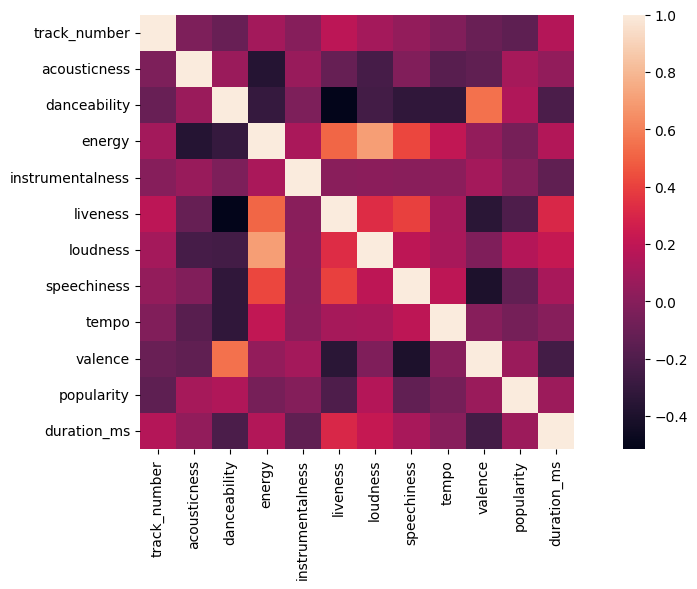

In [18]:
# creating a correlation matrix
corr = df.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(10,6))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()


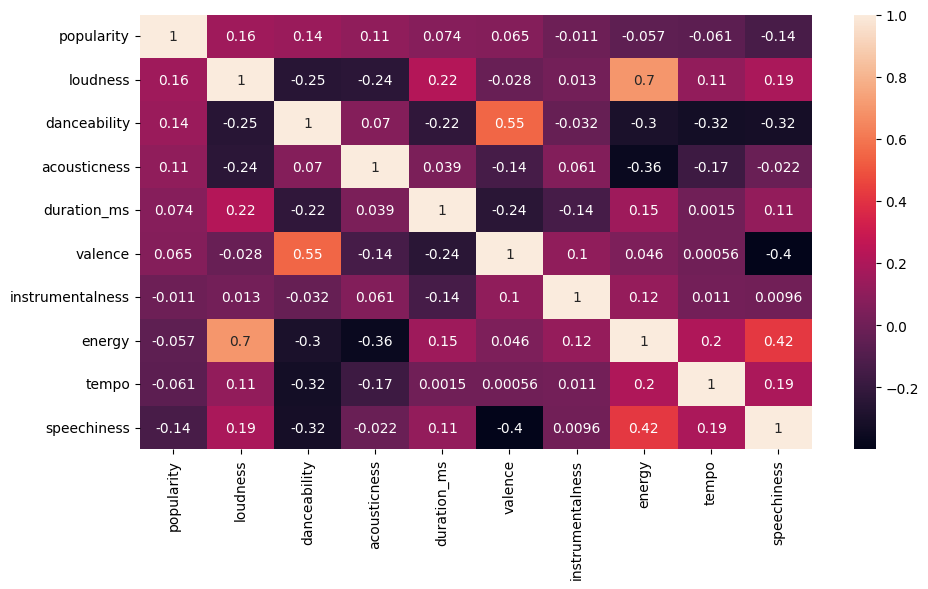

In [19]:
#popularity correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'popularity')['popularity'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True) #cmap = 'viridis'
plt.tight_layout()


**Conclusions**

* Strong negative Correlation between instrumentalness and popularity.
* Negative correlation between loudness and valence.
* Acousticness has a negative correlation to loudness.



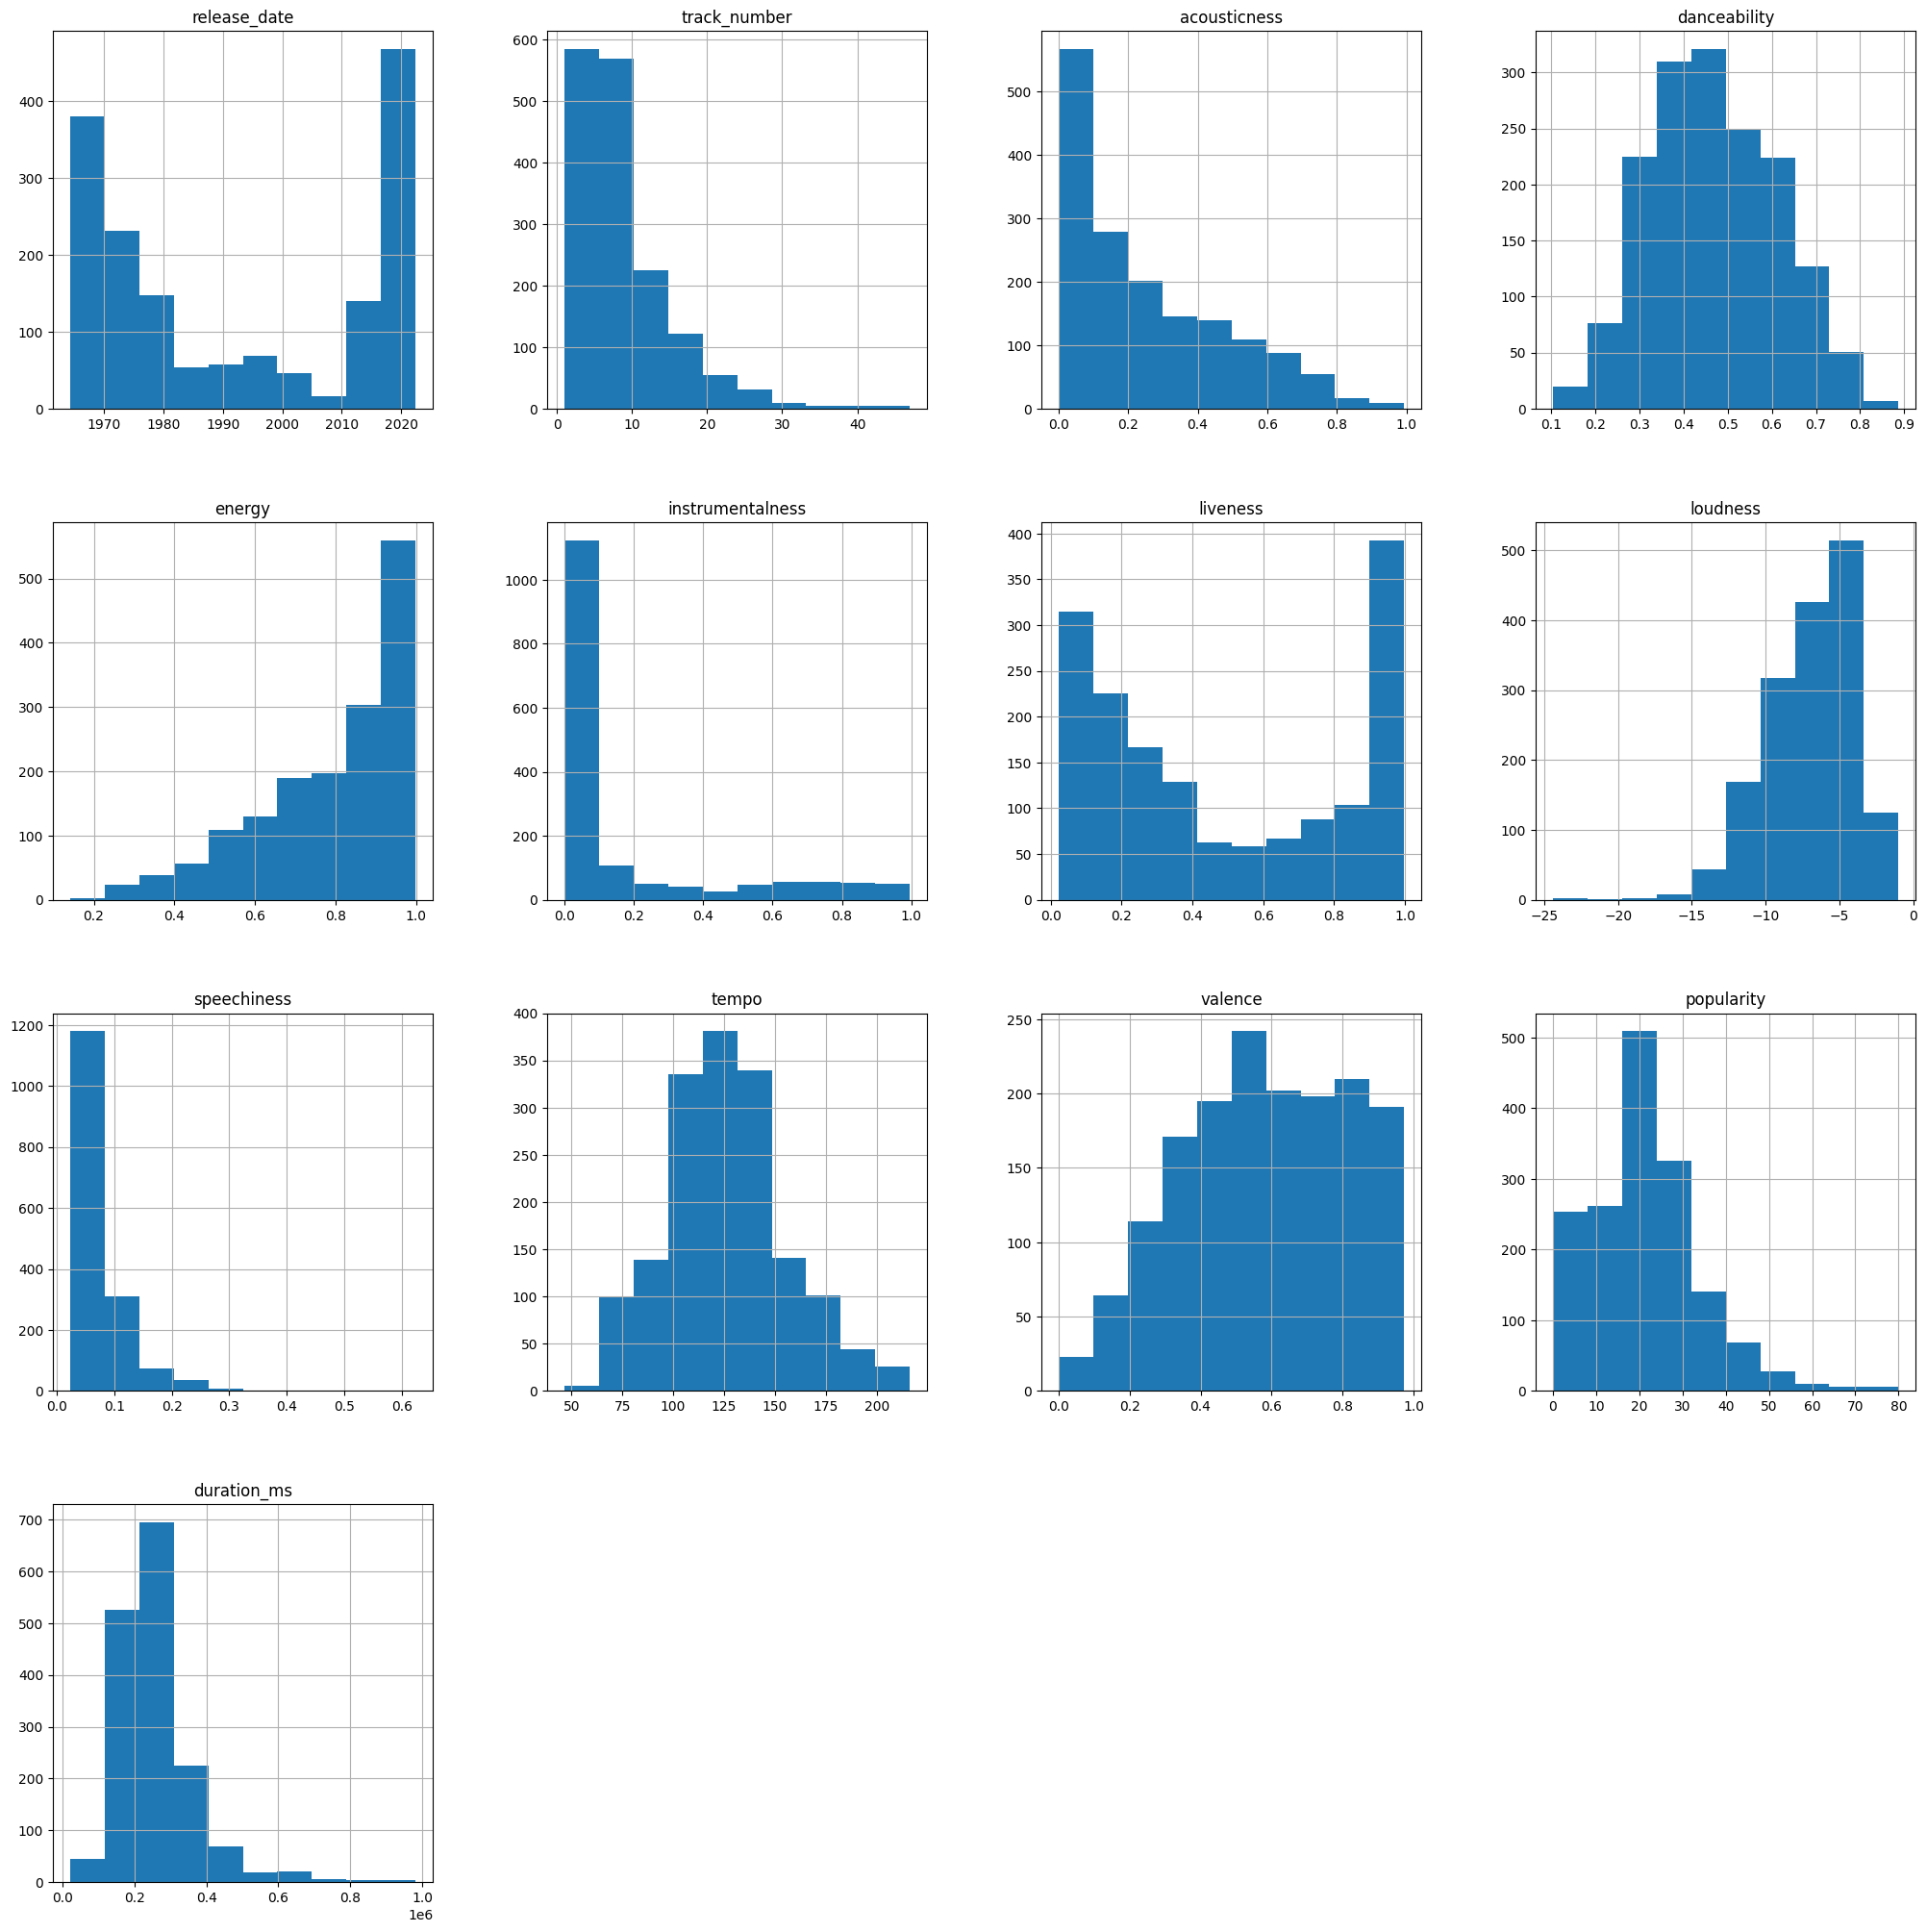

In [20]:
# plotting histograms
df.hist(figsize=(25,25));

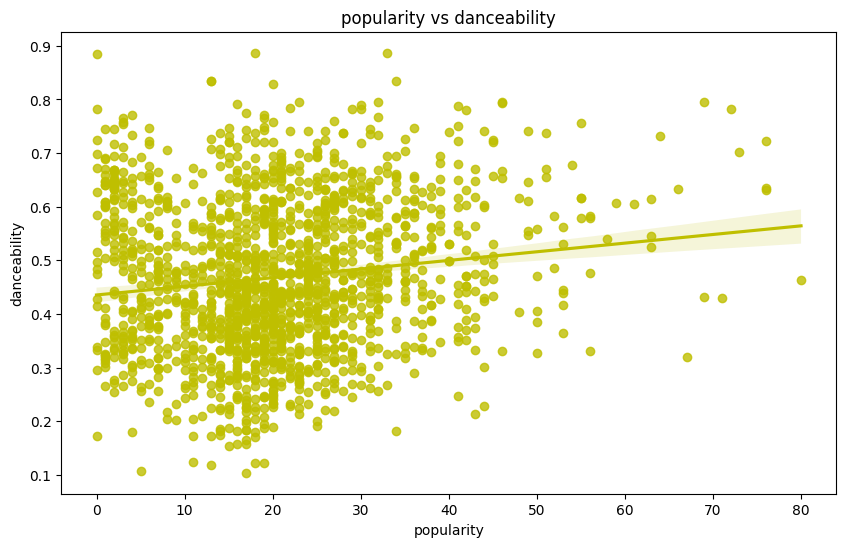

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, y='danceability',x='popularity',color='y').set(title='popularity vs danceability')
plt.show()

We can really see that the majority of the songs over 60th in popularity are highly "danceable".

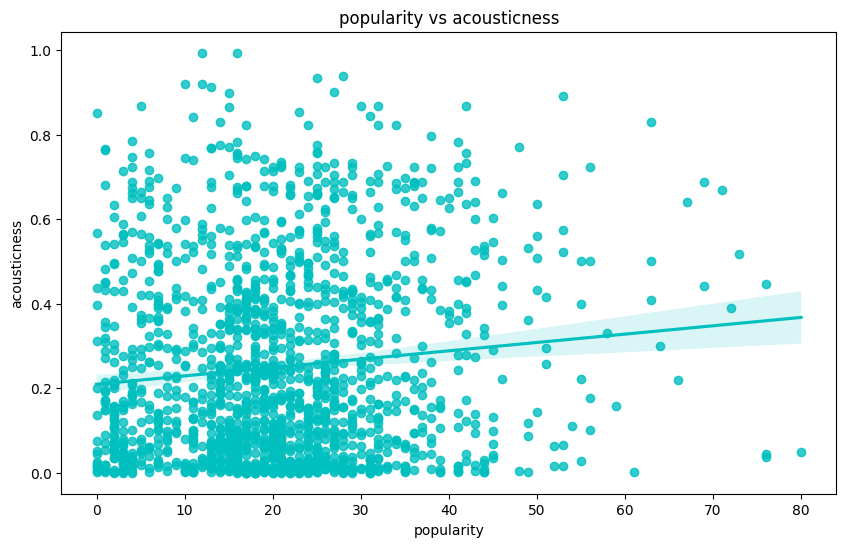

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, y='acousticness',x='popularity',color='c').set(title='popularity vs acousticness')
plt.show()

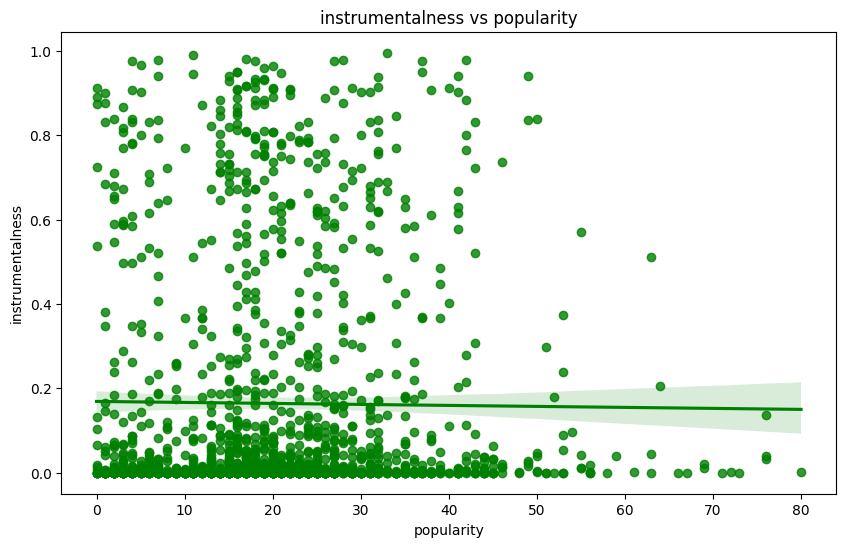

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, y='instrumentalness',x='popularity',color='g').set(title='instrumentalness vs popularity')
plt.show()

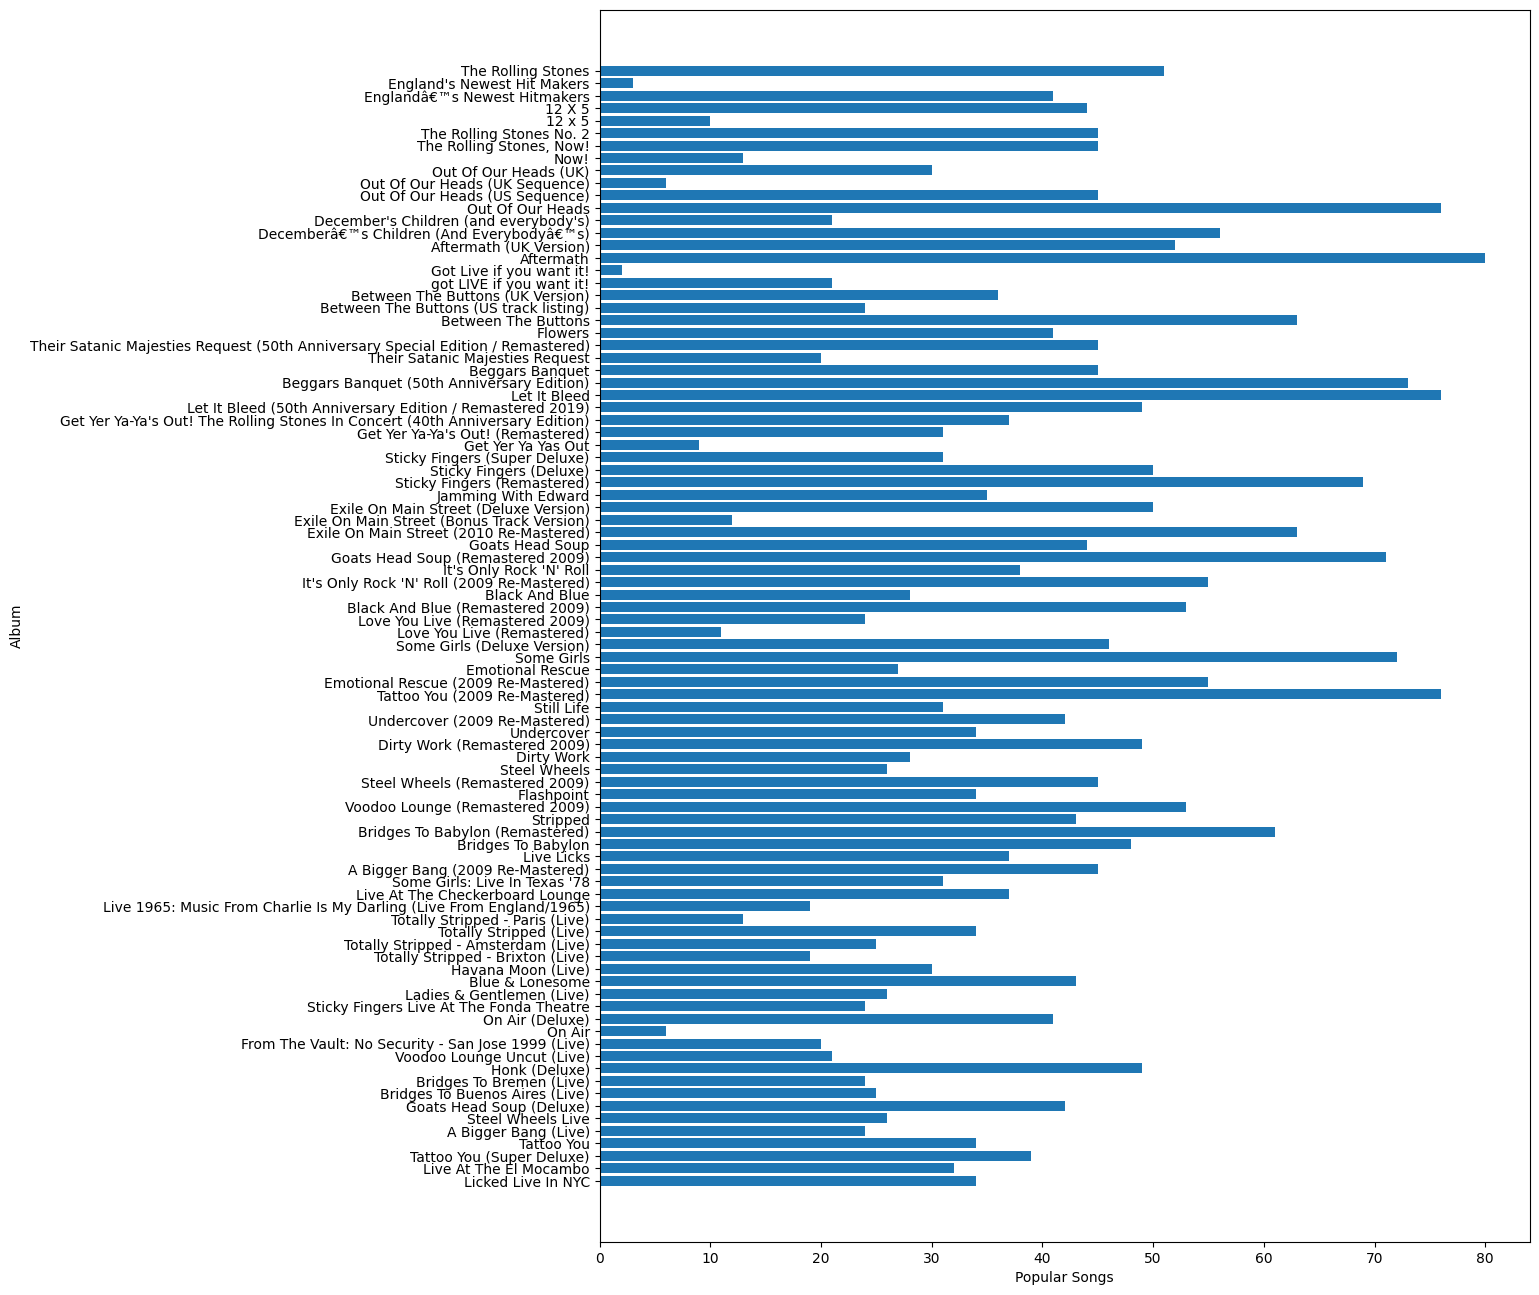

In [24]:
plt.figure(figsize=(12,16))
plt.barh(df['album'], df['popularity'])
plt.xlabel('Popular Songs')
plt.ylabel('Album')
#plt.title('Top Two Albums Based on Popular Songs')
plt.show()


In [25]:
n = 10
print("Most Famous Artists")
df['name'].value_counts()[:n]

Most Famous Artists


Brown Sugar - Live                      16
Honky Tonk Women - Live                 16
Tumbling Dice - Live                    14
Sympathy For The Devil - Live           13
Start Me Up - Live                      12
Miss You - Live                         11
Jumpinâ€™ Jack Flash - Live             11
(I Can't Get No) Satisfaction - Live     9
Street Fighting Man - Live               9
Midnight Rambler - Live                  9
Name: name, dtype: int64

In [26]:
# top songs from the top artist
df.loc[df['name'] == 'Brown Sugar - Live']

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
20,Brown Sugar - Live,Licked Live In NYC,2022-06-10,21,2JMQKVRanp4auj0hGkw3GE,spotify:track:2JMQKVRanp4auj0hGkw3GE,0.439000,0.340,0.989,0.722000,0.982,-4.734,0.1080,139.361,0.1640,25,337600
122,Brown Sugar - Live,A Bigger Bang (Live),2021-07-09,20,26MGQq2uoqVgbXYTEIzsbT,spotify:track:26MGQq2uoqVgbXYTEIzsbT,0.237000,0.377,0.982,0.807000,0.989,-3.728,0.1160,134.148,0.2210,20,363493
149,Brown Sugar - Live,Steel Wheels Live,2020-09-25,25,7eMwaVUReTSTkGPbsWzdOV,spotify:track:7eMwaVUReTSTkGPbsWzdOV,0.006630,0.351,0.977,0.113000,0.996,-4.315,0.1040,141.440,0.2340,16,275920
210,Brown Sugar - Live,Bridges To Buenos Aires (Live),2019-11-08,22,46DrcK6g62mgQ9y3siauiN,spotify:track:46DrcK6g62mgQ9y3siauiN,0.086100,0.344,0.978,0.022800,0.275,-3.888,0.1230,135.341,0.1700,17,421386
232,Brown Sugar - Live,Bridges To Bremen (Live),2019-06-21,22,38T6IwDvXGaf3YdqoRlokG,spotify:track:38T6IwDvXGaf3YdqoRlokG,0.198000,0.362,0.965,0.000000,0.760,-2.958,0.0744,131.353,0.3220,14,449746
306,Brown Sugar - Live,Voodoo Lounge Uncut (Live),2018-11-16,27,6fcNQmdqVkyZb9lXSQwPcs,spotify:track:6fcNQmdqVkyZb9lXSQwPcs,0.068200,0.399,0.967,0.189000,0.970,-4.900,0.0831,137.466,0.3620,13,378025
334,Brown Sugar - Live,Voodoo Lounge Uncut (Live),2018-11-16,27,57jwWTDezhJIA6H5YwfTle,spotify:track:57jwWTDezhJIA6H5YwfTle,0.068200,0.399,0.967,0.189000,0.970,-4.900,0.0831,137.466,0.3620,7,378025
354,Brown Sugar - Live,From The Vault: No Security - San Jose 1999 (L...,2018-07-13,19,5aFATYgESmg4UYuOdKjyOr,spotify:track:5aFATYgESmg4UYuOdKjyOr,0.027800,0.372,0.978,0.107000,0.970,-4.341,0.1410,136.245,0.2550,14,460933
418,Brown Sugar - Live,Sticky Fingers Live At The Fonda Theatre,2017-09-29,13,738RID7Nw6ldnHex8fOGSa,spotify:track:738RID7Nw6ldnHex8fOGSa,0.009170,0.372,0.967,0.014200,0.973,-3.689,0.1260,136.477,0.3120,18,490960
423,Brown Sugar - Live,Ladies & Gentlemen (Live),2017-06-16,2,5XpbQXsog6NzuYocw2rsMP,spotify:track:5XpbQXsog6NzuYocw2rsMP,0.025100,0.384,0.860,0.000030,0.516,-4.426,0.0339,138.518,0.7940,24,193733


In [27]:
print(df.nunique().sort_values())

track_number          47
release_date          57
popularity            69
album                 90
energy               511
danceability         518
speechiness          655
valence              701
liveness             757
acousticness         933
name                 954
instrumentalness    1134
duration_ms         1320
loudness            1329
tempo               1424
uri                 1610
id                  1610
dtype: int64


In [28]:
X=df.iloc[:,[6,7,8,9,10,11,12,13,14,15,16]].values

In [29]:
print(X)

[[8.24000e-02 4.63000e-01 9.93000e-01 ... 3.02000e-02 3.30000e+01
  4.86400e+04]
 [4.37000e-01 3.26000e-01 9.65000e-01 ... 3.18000e-01 3.40000e+01
  2.53173e+05]
 [4.16000e-01 3.86000e-01 9.69000e-01 ... 3.13000e-01 3.40000e+01
  2.63160e+05]
 ...
 [3.71000e-01 7.90000e-01 7.74000e-01 ... 8.35000e-01 3.00000e+01
  1.76080e+05]
 [2.17000e-01 7.00000e-01 5.46000e-01 ... 5.32000e-01 2.70000e+01
  1.21680e+05]
 [3.83000e-01 7.27000e-01 9.34000e-01 ... 9.69000e-01 3.50000e+01
  1.89186e+05]]


In [30]:
X=pd.DataFrame(df.iloc[:,[6,7,8,9,10,11,12,13,14,15,16]].values)

In [31]:
cols = df.iloc[:,[6,7,8,9,10,11,12,13,14,15,16]].columns

In [32]:
X.columns = cols

In [33]:
X.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33.0,48640.0
1,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34.0,253173.0
2,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34.0,263160.0
3,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32.0,305880.0
4,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32.0,305106.0


WCSS

In [34]:
#Finding wcss value for different number of clusters

wcss=[]

for i in range(1,15):
  Kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  Kmeans.fit(X)

  wcss.append(Kmeans.inertia_)

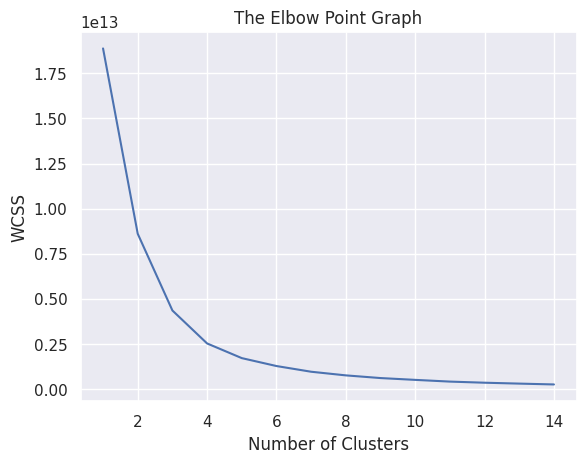

In [35]:
sns.set()
plt.plot(range(1,15),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum no of Clusters=4

Training the k-Means Clustering Model

In [36]:
wcss

[18883453775914.83,
 8605294563482.111,
 4348767146630.302,
 2520912823170.557,
 1707751333082.0962,
 1268392334136.4827,
 952433618845.584,
 750389905228.4104,
 601458178011.8003,
 500812619129.5251,
 405622547494.3555,
 343275088658.56665,
 293853474388.57074,
 247213717036.13968]

In [37]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
scaled = pd.DataFrame(scaler.fit_transform(X))


In [39]:
scaled= scaler.fit_transform(X)

In [40]:
# instantiating model
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)


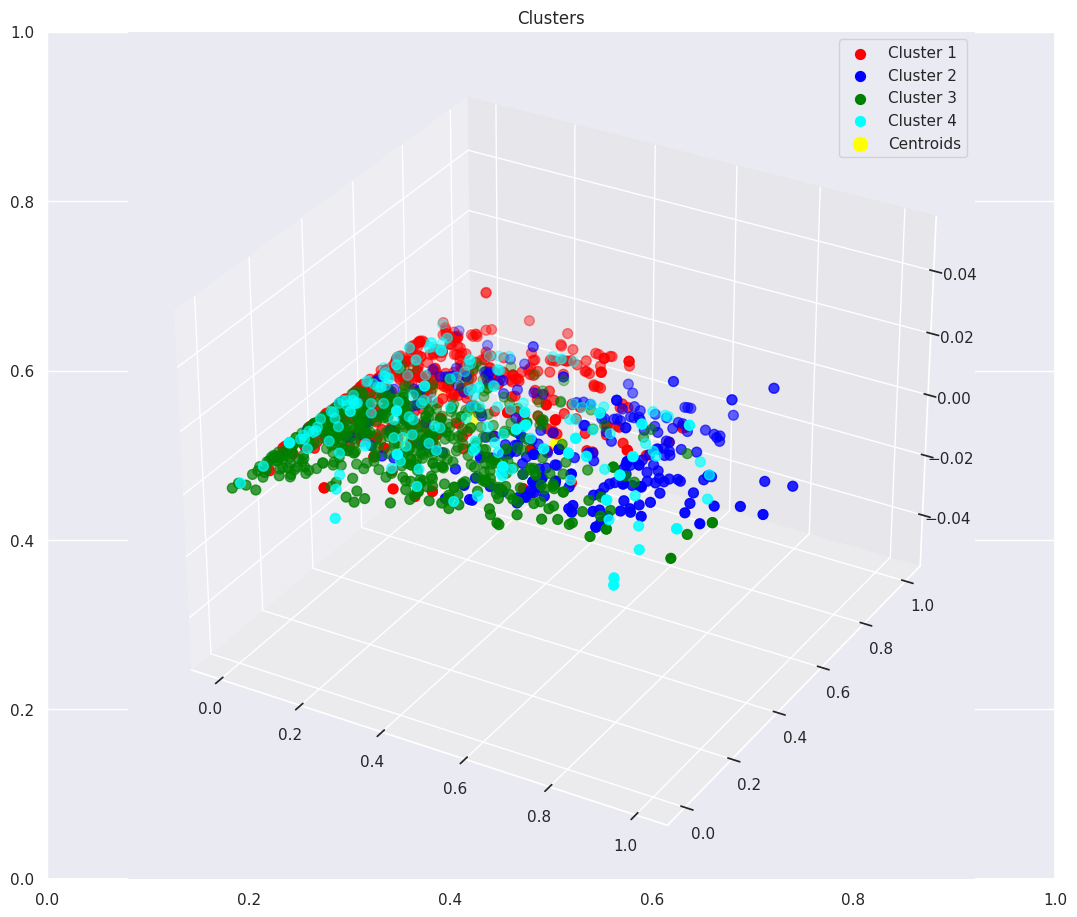

In [41]:
#plotting all the clusters and their centroids
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 100, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

Since we're working with many features, our visualization is not simple.
we can still understand the visualization, and have an idea of what the clusters look like.

In [42]:
#predictions
y_kmeans

array([3, 2, 2, ..., 0, 1, 0], dtype=int32)

In [43]:
# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']


In [44]:
# predictions as a df
print(kmeans.shape)
kmeans.head()

(1610, 1)


,k_cluster
0,3
1,2
2,2
3,2
4,2


Now that we have organized the songs in Clusters, it's time to see if our clusters make any sense. To do that, let's concatenate our predictions to our original dataset

In [45]:
# creating a copy of the dataset
df_cluster = df.copy()


In [46]:
# concatenating the cluster column to the dataframe
df_cluster = pd.concat([df_cluster, kmeans], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head()

(1610, 18)


,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,k_cluster
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,3
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,2
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,2
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,2
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,2


Cluster Data Analysis

In [47]:
# popularity mean by cluster
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
1    24.110701
0    22.603025
3    21.140909
2    17.503390
Name: popularity, dtype: float64